In [1]:
import json
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
# Opens the JSON file for DEFAULT PRIPR
with open('CE0.2_result.json', 'r') as file:
    # Parses the JSON data
    default_data = json.load(file)

# Access the value of the key and store them in arrays
default_posteriors = np.array([
np.array(default_data['posterior']['content']['chirp_mass']),
np.array(default_data['posterior']['content']['mass_1']),
np.array(default_data['posterior']['content']['mass_2']),
np.array(default_data['posterior']['content']['mass_ratio']),
np.array(default_data['posterior']['content']['luminosity_distance'])
])                                                                           

 # Opens the JSON file for CUSTOM PRIOR
with open('/home/sagi/Desktop/Data /Custom prior results/ChirpMass_GW150914.json', 'r') as file:
    # Parses the JSON data
    custom_data = json.load(file)

# Access the value of the key and store them in arrays
custom_posteriors = np.array([
np.array(custom_data['posterior']['content']['chirp_mass']),
np.array(custom_data['posterior']['content']['mass_1']),
np.array(custom_data['posterior']['content']['mass_2']),
np.array(custom_data['posterior']['content']['mass_ratio']),
np.array(custom_data['posterior']['content']['luminosity_distance'])
])   

In [2]:
# Opens the JSON file
with open('/home/sagi/Desktop/Data /Custom prior results/ChirpMass_GW150914.json', 'r') as file:
    # Parses the JSON data
    custom_data = json.load(file)

# Access the value of the key 
custom_chirpmass_posterior = custom_data['posterior']['content']['chirp_mass']
custom_mass1_posterior = custom_data['posterior']['content']['mass_1']
custom_mass2_posterior = custom_data['posterior']['content']['mass_2']
custom_massratio_posterior = custom_data['posterior']['content']['mass_ratio']
custom_luminositydistance_posterior = custom_data['posterior']['content']['luminosity_distance']

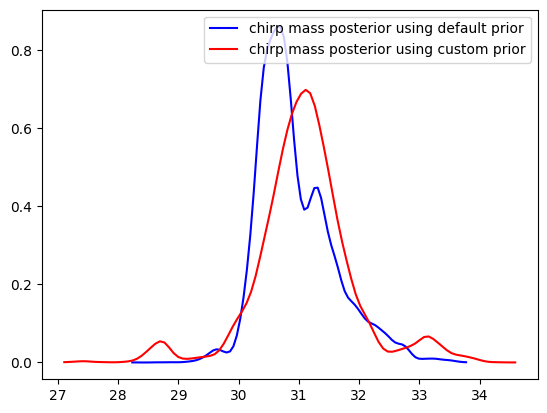

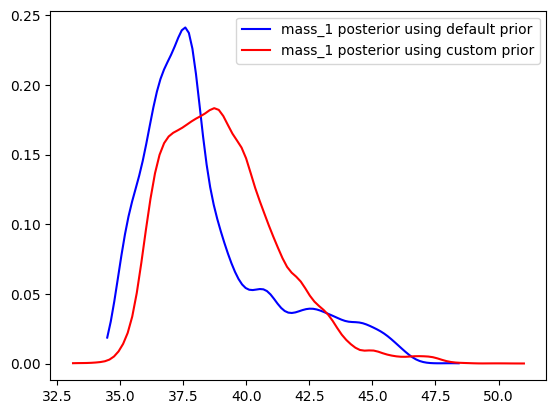

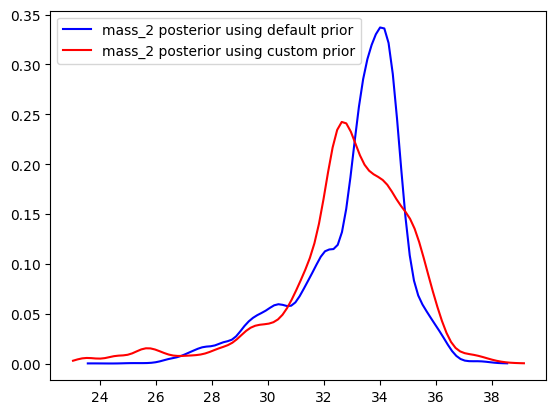

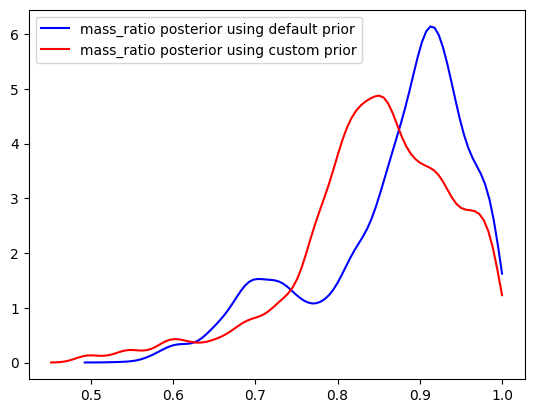

In [3]:
default_kde=[[] for _ in range(4)] 
custom_kde=[[] for _ in range(4)]  
x_default = [[] for _ in range(4)] 
x_custom = [[] for _ in range(4)] 
label_names=["chirp mass", "mass_1", "mass_2","mass_ratio","luminosity_distance"]
for i in range(4):
    default_kde[i].append(gaussian_kde(default_posteriors[i]))
    custom_kde[i].append(gaussian_kde(custom_posteriors[i]))                         
    plt.figure()
    x_default[i] = np.linspace(min(default_posteriors[i]), max(default_posteriors[i]), 100)
    x_custom[i] = np.linspace(min(custom_posteriors[i]), max(custom_posteriors[i]), 100)
    
    # plot the KDEs
    plt.plot(x_default[i], default_kde[i][0](x_default[i]), 'b', label=label_names[i]+' posterior using default prior')
    plt.plot(x_custom[i], custom_kde[i][0](x_custom[i]), 'r', label=label_names[i]+' posterior using custom prior')
    plt.legend()
    plt.show()

In [4]:
print(default_posteriors[0])
print(default_posteriors[3])
print(custom_posteriors[0])
print(custom_posteriors[3])

[31.0006586  30.15026381 30.61942171 ... 30.62087123 30.57063017
 30.57063017]
[0.80604377 0.77046885 0.90326001 ... 0.91872872 0.9664814  0.9664814 ]
[30.19764203 29.39041773 29.54966163 ... 30.76733705 30.76733705
 30.76733705]
[0.70647353 0.45181774 0.76121415 ... 0.94030804 0.94030804 0.94030804]


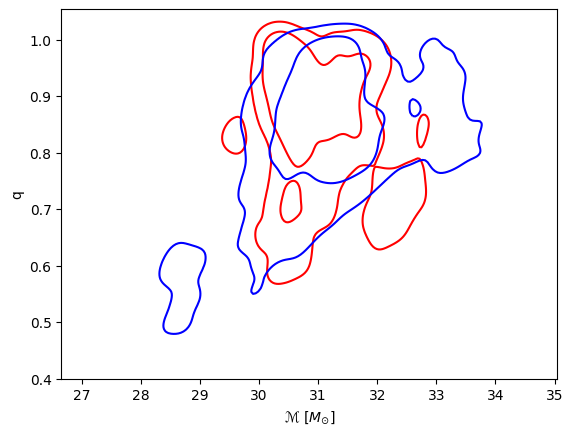

In [6]:

# Create a pandas DataFrame with default_posteriors
default_data = pd.DataFrame({'Chirpmass_default': default_posteriors[0], 'Massratio_default': default_posteriors[3]})

# Create a pandas DataFrame with custom_posteriors
custom_data = pd.DataFrame({'Chirpmass_custom': custom_posteriors[0], 'Massratio_custom': custom_posteriors[3]})

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a 2D KDE plot using seaborn for default_posteriors
sns.kdeplot(x=default_data['Chirpmass_default'], y=default_data['Massratio_default'], color="red", fill=False,alpha=1, levels = [0.05, 0.32], ax=ax)

# Create a 2D KDE plot using seaborn for custom_posteriors
sns.kdeplot(x=custom_data['Chirpmass_custom'], y=custom_data['Massratio_custom'], color="blue", fill=False,alpha=1, levels = [0.05, 0.32], ax=ax)

plt.xlabel(r'ℳ [$M_{\odot}$]')
plt.ylabel(r'q')
# Display the plot
plt.show()